<a href="https://colab.research.google.com/github/edx04/data-science/blob/main/TreeArellano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/edx04/data-science/main/data/Employee.csv')

In [3]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [24]:
data = df.copy()

cat_vars=['Education','City','Gender']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
    
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
data_final=data[to_keep]
data_final.columns.values
data_final.EverBenched = data_final.EverBenched.map(dict(Yes=1, No=0))

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [25]:
data_final

,JoiningYear,PaymentTier,Age,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Education_Bachelors,Education_Masters,Education_PHD,City_Bangalore,City_New Delhi,City_Pune,Gender_Female,Gender_Male
0,2017,3,34,0,0,0,1,0,0,1,0,0,0,1
1,2013,1,28,0,3,1,1,0,0,0,0,1,1,0
2,2014,3,38,0,2,0,1,0,0,0,1,0,1,0
3,2016,3,27,0,5,1,0,1,0,1,0,0,0,1
4,2017,3,24,1,2,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4648,2013,3,26,0,4,0,1,0,0,1,0,0,1,0
4649,2013,2,37,0,2,1,0,1,0,0,0,1,0,1
4650,2018,3,27,0,5,1,0,1,0,0,1,0,0,1
4651,2012,3,30,1,2,0,1,0,0,1,0,0,0,1


In [38]:
X = data_final.drop(['JoiningYear', 'LeaveOrNot'], axis=1)

y = df.loc[:, df.columns == 'LeaveOrNot']

In [39]:
X.shape

(4653, 12)

In [40]:
y.shape

(4653, 1)

In [33]:
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 123)

clf.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=123)

[Text(0.5, 0.8333333333333334, 'X[0] <= 2.5\ngini = 0.451\nsamples = 4653\nvalue = [3053, 1600]'),
 Text(0.25, 0.5, 'X[9] <= 0.5\ngini = 0.495\nsamples = 1161\nvalue = [522, 639]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.468\nsamples = 586\nvalue = [367, 219]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.394\nsamples = 575\nvalue = [155, 420]'),
 Text(0.75, 0.5, 'X[5] <= 0.5\ngini = 0.399\nsamples = 3492\nvalue = [2531, 961]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.357\nsamples = 3030\nvalue = [2324, 706]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.495\nsamples = 462\nvalue = [207, 255]')]

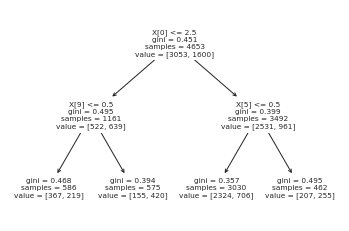

In [34]:
tree.plot_tree(clf)

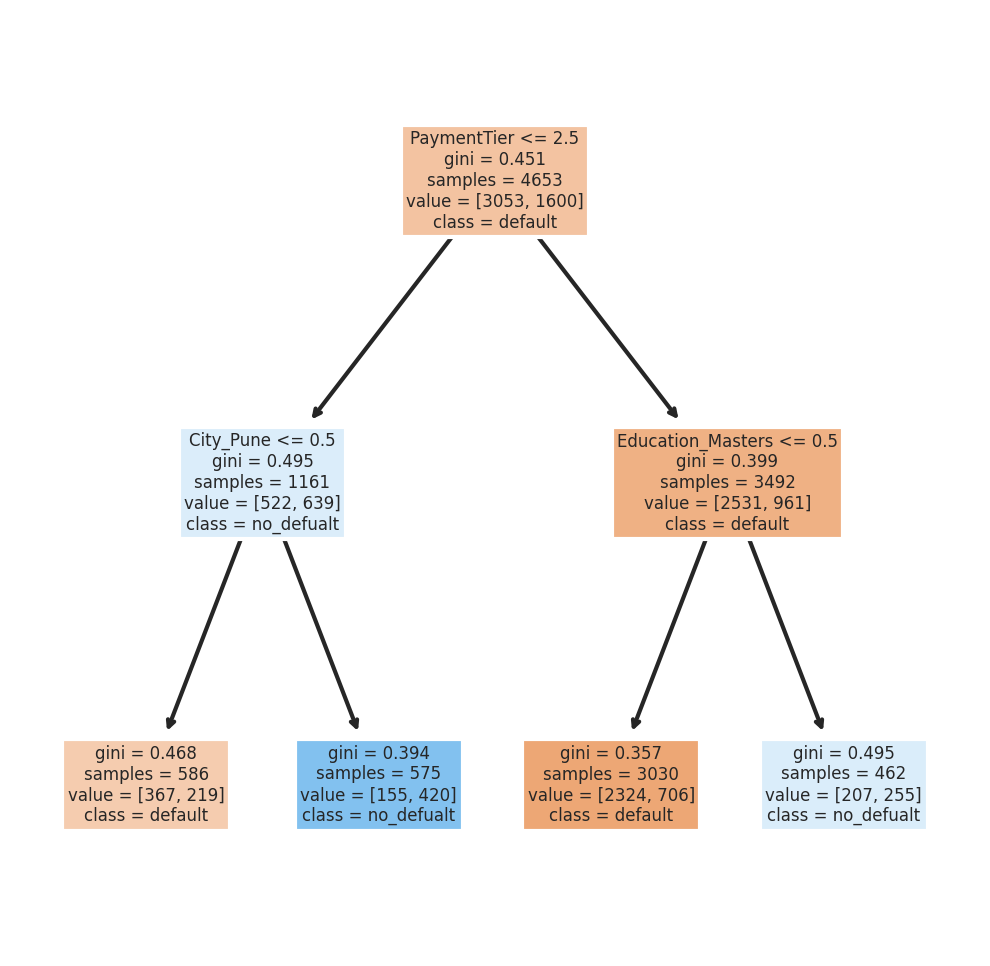

In [35]:
cn=['default', 'no_defualt']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = X.columns, 
               class_names=cn,
               filled = True);


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [42]:
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 123)

clf.fit(X_train,y_train)

y_pred= clf.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)


[[813 109]
 [277 197]]


In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.75      0.88      0.81       922
           1       0.64      0.42      0.51       474

    accuracy                           0.72      1396
   macro avg       0.69      0.65      0.66      1396
weighted avg       0.71      0.72      0.71      1396

